In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('empreinteCarboneMissions_2022121.tsv', sep='\t')
data = data.rename(columns={'Quantité' : 'N', 'Distance (km)': 'dist'})
data

,ID,Type,Mode de deplacement,N,Statut,Nombre de personne,Motif,Aller / Retour,dist,Emission (kg eCO2),Incertitude (kg eCO2)
0,"1,2,99,515,868,1015,1370,1639",MX,plane,8,NaN,1,NaN,OUI,79500,6591,659
1,"1,91,280,838,871,873,962,968,988,1190,1239,135...",NaN,train,15,NaN,1,NaN,OUI,21405,64,13
2,2,MX,plane,1,NaN,1,NaN,OUI,9511,788,79
3,2,NaN,plane,1,NaN,1,NaN,OUI,875,124,12
4,3,NaN,plane,1,NaN,1,NaN,OUI,1691,239,24
...,...,...,...,...,...,...,...,...,...,...,...
603,230,MX,plane,1,NaN,1,NaN,OUI,2169,222,22
604,231,NaN,car,1,NaN,1,NaN,OUI,291,68,41
605,232,NaN,car,1,NaN,1,NaN,OUI,291,68,41
606,233,NaN,train,1,NaN,1,NaN,OUI,2008,6,1


In [23]:
subdata = data.loc[:, ['N', 'dist']]
subdata = subdata.loc[subdata['dist'] > 0, :]
subdata = subdata.sort_values(by='dist')
dist = subdata['dist'].values.copy()
N = subdata['N'].values.copy()
dist = dist / N

In [24]:
dmin = float(dist.min())
dmin

9.0

In [25]:
dmax = float(dist.max())
dmax

34492.0

In [26]:
dmax = 35000
dmax

35000

In [27]:
step = 500
bins = np.arange(0, dmax + step, step)
nbins = len(bins)
bins

array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
        4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
        9000,  9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000,
       13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500,
       18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000,
       22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500,
       27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000,
       31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000])

In [28]:
dl = np.diff(bins)[0]

In [29]:
index = np.digitize(dist, bins, right=True)

In [30]:
outputs = np.zeros((len(bins) - 1), dtype=float)
for i in np.unique(index):
    iok = np.nonzero(index == i)[0]
    outputs[i - 1] = N[iok].sum()

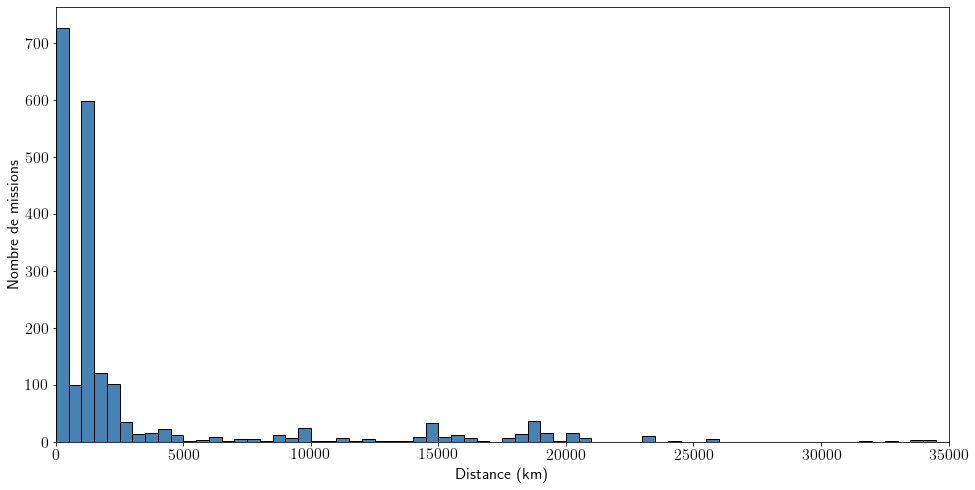

In [31]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8), facecolor='white')
plt.bar(bins[slice(0, nbins - 1)], outputs, width=dl, align='edge', color='steelblue', edgecolor='k')
plt.xlabel('Distance (km)')
plt.ylabel('Nombre de missions')
plt.xlim(0, dmax)
plt.savefig('number_missions.png', bbox_inches='tight')